In [16]:
import numpy as np
from scipy import linalg as la
import sympy as sy
from matplotlib import pyplot as plt
import math

In [2]:
""" Problem 1 """

def conditionnum(A):
    
    singular = la.svdvals(A)
    maxval = max(singular)
    minval = min(singular)
    
    if minval == 0:
        return np.inf
    else:
        return maxval/minval
    
A = np.array([[1, 1], [1, 1+1e-10]])
print(np.linalg.cond(A))
print(conditionnum(A))

q, r = la.qr(A)
print(np.linalg.cond(q))
print(conditionnum(q))

B = np.array([[1, 1], [0, 0]])
print(conditionnum(B))

39999991794.1
39999991794.1
1.0
1.0
inf


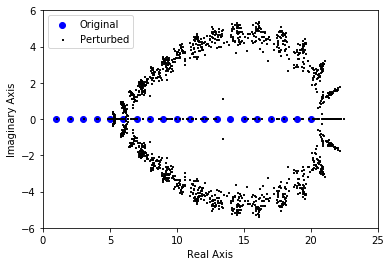

(3.48812469529914e-9, 2407461764.23253)


In [3]:
""" Problem 2 """

def prob2():
    w_roots = np.arange(1, 21)

    x, i = sy.symbols('x i')
    w = sy.poly_from_expr(sy.product(x-i, (i, 1, 20)))[0]
    w_coeffs = np.array(w.all_coeffs())
    w_roots = np.sort(w_roots)
    k_abs = 0
    k_rel = 0
    k = 0
    plt.scatter(w_roots.real, w_roots.imag, marker='o', color ="b")
    for i in range(100):
        new_coeffs = w_coeffs * np.random.normal(1,1e-10, len(w_coeffs))
        new_roots = np.roots(np.poly1d(new_coeffs))
        h = w_coeffs - new_coeffs
        new_roots = np.sort(new_roots)
        plt.scatter(new_roots.real, new_roots.imag, marker=',', color ="k", s = 1)
        k = la.norm(new_roots - w_roots, np.inf) / la.norm(h, np.inf)
        k_abs += k
        k_rel += k * la.norm(w_coeffs, np.inf) / la.norm(w_roots, np.inf)
        
    plt.axis([0,25,-6,6])
    plt.xlabel("Real Axis")
    plt.ylabel("Imaginary Axis")
    plt.legend(["Original", "Perturbed"])
    plt.show()
    
    return k_abs/100, k_rel/100

print(prob2())

In [4]:
""" Problem 3 """

def prob3(A):

    reals = np.random.normal(0, 1e-10, A.shape)
    imags = np.random.normal(0, 1e-10, A.shape)
    H = reals + 1j*imags
    Ahat = A + H
    
    eigsA = la.eigvals(A)
    eigsAhat = la.eigvals(Ahat)
    
    k_abs = la.norm(eigsA - eigsAhat)/la.norm(H, ord = 2)
    k_rel = la.norm(A, ord = 2)/la.norm(eigsA)*k_abs
    
    return k_abs, k_rel

A = np.random.rand(6,6)
print(prob3(A))

(2153468045.8913846, 2167432271.6023479)


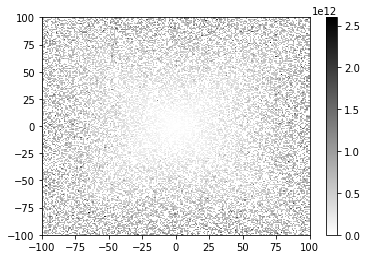

In [5]:
""" Problem 4 """

def prob4(bounds, res = 200):
    X = np.linspace(bounds[0],bounds[1],res)
    Y = np.linspace(bounds[2],bounds[3],res)
    k_rel = np.zeros((len(X),len(Y)))
    
    for i in range(len(X)):
        for j in range(len(Y)):
            A = np.array([[1,X[i]],[Y[j],1]])
            k_rel[i, j]  = prob3(A)[1]
              
    plt.pcolormesh(X,Y,k_rel,cmap='gray_r')
    plt.colorbar()
    plt.show()
    
bounds = [-100, 100, -100, 100]
prob4(bounds)

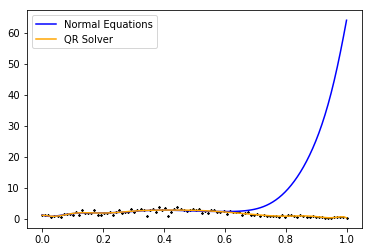

(152.14373083729365, 4.5683709383382585)

In [6]:
""" Problem 5 """

def prob5(n):
    
    xk, yk = np.load("/Users/Deehrlich/Desktop/BootCamp2017/Computation/Wk4_DifIntOpt/stability_data.npy").T
    A = np.vander(xk, n+1)
    
    sol1 = la.inv(A.T@A)@A.T@yk
    err1 = la.norm(A@sol1 - yk)
    
    Q,R = np.linalg.qr(A)
    sol2  = la.solve_triangular(R, Q.T@yk)
    err2 = la.norm(A@sol2 - yk)
    
    xrange = np.linspace(0,1,100)
    normal = np.polyval(sol1,xk)
    qr = np.polyval(sol2,xk)
    
    plt.plot(xk,yk, marker = '*', color = "k", markersize = 2, lw = 0)
    plt.plot(xrange, normal, color = "blue", label = "Normal Equations")
    plt.plot(xrange, qr, color = "orange", label = "QR Solver")
    plt.legend()
    plt.show()
    
    return err1, err2

prob5(14)

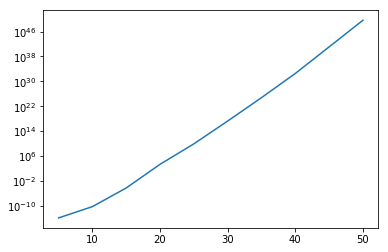

In [20]:
""" Problem 6 """

def prob6():

    error = np.zeros(10)
    n = np.linspace(5,50,10)
    x = sy.Symbol('x')
    for i in range(len(n)):
        factorial = float((-1)**int(n[i]) * sy.subfactorial(int(n[i])) + (-1)**(int(n[i])+1)*sy.factorial(int(n[i]))/sy.exp(1))
        integral =  sy.integrate((x**int(n[i]))*(sy.exp(1))**(x-1),(x,0,1))
        error[i] = float(abs(integral - factorial)/abs(integral))
    
    plt.plot(n, error)
    plt.yscale("log")
    plt.show()

prob6()
""" This is not a stable method for computing I(n) as is clearly seen from the graph since
the error is increasing exponentially."""